In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import  KNeighborsClassifier as classifier



In [ ]:

# Load the uploaded CSV file
df = pd.read_csv(r"C:\Users\hp\repositories\Corizo\Machine Learning\Final Project\Minor\TISC Historical Data (1).csv", parse_dates=['Date'])

# Sort by date
df = df.sort_values('Date')
df.head()


data = df  # Alias df to data for downstream compatibility

C:\Users\hp\AppData\Local\Temp\ipykernel_17020\3952845381.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(r"C:\Users\hp\repositories\Corizo\Machine Learning\Final Project\Minor\TISC Historical Data (1).csv", parse_dates=['Date'])


In [ ]:
# # Add new columns for the 'Price' from the previous 5 days to help the model learn from past values

days = 5
data = data.assign( **{f"lag_{i}": data["Price"].shift(i) for i in range(1, days + 1)}).dropna()


In [ ]:

X = data[[f"lag_{i}" for i in range(1, days + 1)]]
y = data["Price"]


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Train KNN model
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
preds = model.predict(X_test)


In [ ]:
print(preds)

[130.75333333 127.68       127.68       127.91       125.57666667
 132.59666667 131.83       131.15       128.5        131.90666667
 129.47333333 128.75666667 131.58333333 133.49       136.24
 137.77333333 137.77333333 137.77333333 135.7        137.76
 137.77333333 136.24       143.64       144.13       145.43666667
 150.37666667 149.82666667 148.46       149.02       149.02
 155.85333333 156.39333333 160.32333333 157.42666667 157.80666667
 157.80666667 154.34333333 154.27333333 153.60333333 152.87
 153.55666667 152.99       147.55666667 139.45333333 139.55
 131.84666667 127.84666667 132.43       132.17       131.35666667
 137.77333333 136.24       137.77333333]


In [ ]:

from sklearn.preprocessing import StandardScaler

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# Re-train model with scaled data
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


In [ ]:

# Create directional target: predict if tomorrow's price is higher than today
y_class = (y.diff().shift(-1) > 0).astype(int)
X_class = X.copy()

# Drop any rows with missing values in target or features
X_class = X_class.loc[y_class.dropna().index]
y_class = y_class.dropna()

# Train/test split for classifier
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, shuffle=False)

# Scale the classifier data
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)

# Train classifier
clf = classifier(n_neighbors=3)
clf.fit(Xc_train_scaled, yc_train)
clf_preds = clf.predict(Xc_test_scaled)

# Evaluate classification accuracy
clf_acc = accuracy_score(yc_test, clf_preds)
clf_acc


0.5094339622641509

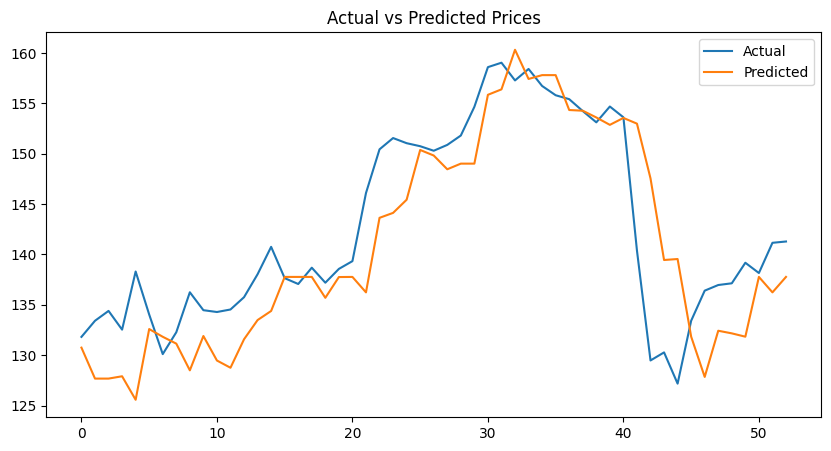

In [ ]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(preds, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()
